# Round 3. Apply K-fold 

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [47]:
#The objective is to provide a confidence interval for the performance 
#of our model using K-fold cross validation



In [48]:
churnData2=pd.read_csv('churnData2')
churnData2.shape

(7043, 6)

In [49]:
churnData2

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,29.85,29.85,0
1,1,0,34,56.95,1889.50,0
2,2,0,2,53.85,108.15,1
3,3,0,45,42.30,1840.75,0
4,4,0,2,70.70,151.65,1
...,...,...,...,...,...,...
7038,7038,0,24,84.80,1990.50,0
7039,7039,0,72,103.20,7362.90,0
7040,7040,0,11,29.60,346.45,0
7041,7041,1,4,74.40,306.60,1


In [50]:
churnData2.drop(['Unnamed: 0'], axis = 1, inplace = True) 
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [51]:
#For it we need check if the values of the 'Churn' feature are balanced
churnData2['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [52]:
# As we can see there is a huge imbalance in the data in the representation
# of the two categories. Category 0 is represented 5174 times and category 1 is represented 1869 times.


## Let's try downsampling and upsampling to create a balance between the two classes

### Downsampling


In [53]:
category_0 = churnData2[churnData2['Churn'] == 0]
category_1 = churnData2[churnData2['Churn'] == 1]


In [54]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [55]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [56]:
churnData2 = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
churnData2 = churnData2.sample(frac=1)
churnData2['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [57]:
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
2087,0,4,33.65,137.85,1
472,0,9,70.05,564.40,0
4929,1,63,84.00,5329.55,0
2758,0,5,20.25,109.80,0
1238,1,16,96.15,1529.20,1
...,...,...,...,...,...
5546,0,4,42.40,146.40,0
3963,0,68,19.60,1441.65,0
2714,0,54,95.10,5064.85,0
3506,0,19,84.75,1651.95,0


### Upsampling Method 1

In [58]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 5)


In [59]:
category_1_up

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3146,0,5,99.15,465.05,1
4471,1,41,83.75,3273.55,1
6172,0,10,70.10,659.65,1
6813,0,64,47.85,3147.50,1
876,0,15,105.10,1582.75,1
...,...,...,...,...,...
2442,1,7,84.80,546.95,1
55,1,18,95.45,1752.55,1
4997,1,2,44.70,93.70,1
4624,0,8,94.70,740.30,1


In [60]:
category_1_up.shape

(5174, 5)

In [61]:
churnData3 = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
churnData3 = churnData3.sample(frac=1)
churnData3['Churn'].value_counts()
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3702,1,20,79.15,1520.90,1
2070,0,49,59.75,2934.30,1
4664,0,2,74.90,147.15,1
5450,0,1,84.65,84.65,1
1999,0,23,74.95,1710.45,1
...,...,...,...,...,...
2123,0,31,80.45,2429.10,0
5696,0,22,54.20,1152.70,1
3751,0,60,109.45,6572.85,0
4272,0,56,25.15,1327.15,1


## Cross Validation applying K-fold 

###  ChurnData2 (Downsampling)

In [62]:
#Define the target variable before de scale
X=churnData2.drop('Churn', axis=1)
y=churnData2.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### Fit a Decision Tree Classifier on the training data 

,Error_metric,Train,Test
0,Accuracy,0.750765,0.736185
1,Precision,0.723666,0.711569
2,Recall,0.810107,0.797513


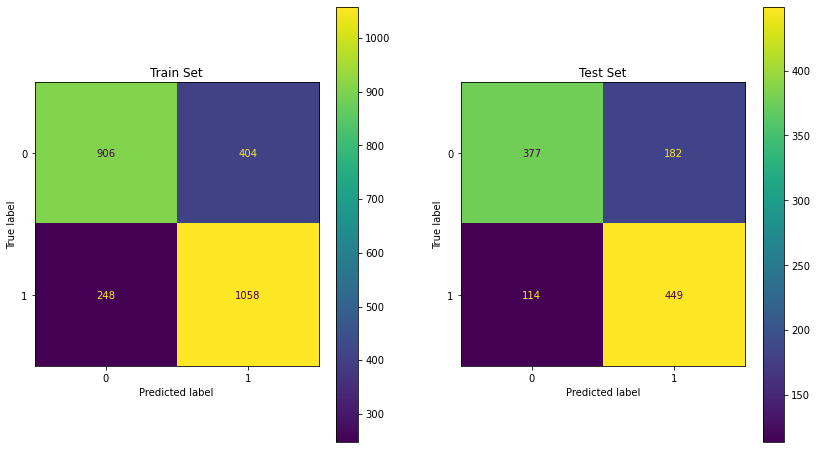

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


In [64]:
#After de downsampling we see an improvement in Accuracy, Precision and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [65]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.71374046, 0.71701721, 0.74760994, 0.71128107, 0.70554493])

###  ChurnData3 (Upsampling)

In [66]:
#Define the target variable before de scale
X=churnData3.drop('Churn', axis=1)
y=churnData3.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [67]:
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3702,1,20,79.15,1520.90,1
2070,0,49,59.75,2934.30,1
4664,0,2,74.90,147.15,1
5450,0,1,84.65,84.65,1
1999,0,23,74.95,1710.45,1
...,...,...,...,...,...
2123,0,31,80.45,2429.10,0
5696,0,22,54.20,1152.70,1
3751,0,60,109.45,6572.85,0
4272,0,56,25.15,1327.15,1


,Error_metric,Train,Test
0,Accuracy,0.736849,0.728180
1,Precision,0.694966,0.702452
2,Recall,0.835238,0.812224


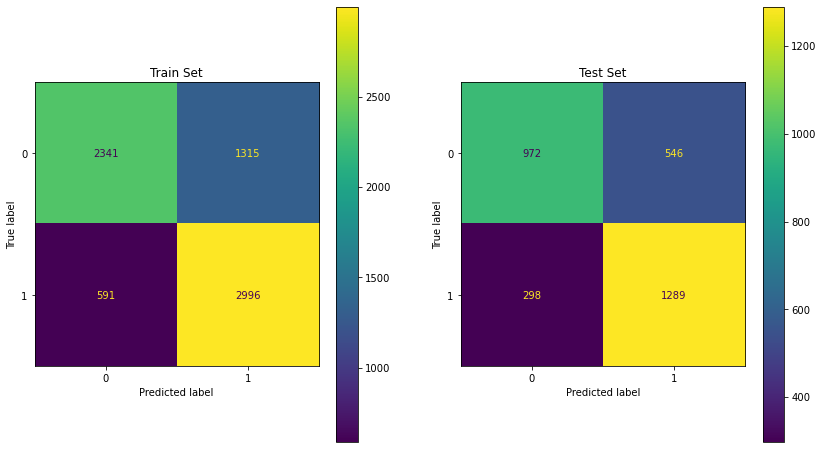

In [68]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [69]:
# After the upsampling we can see an improvement in Accuracy and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [70]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.74741201, 0.73498965, 0.7515528 , 0.72651934, 0.71961326])

# Round 4 

In [150]:
churnData_forest=pd.read_csv('churnData2', index_col = 0)
churnData_forest

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


## Random forest (Downsampling)

### We start  balancing the data 

In [72]:
churnData_forest['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [73]:
category_0 = churnData2[churnData2['Churn']==0].sample(len(churnData2[churnData2['Churn']==1]))
category_0.shape

(1869, 5)

In [74]:
category_1 = churnData2[churnData2['Churn']== 1 ]
data = pd.concat([category_0, category_1], axis = 0)
data = data.sample(frac =1)
data = data.reset_index(drop=True)
data.shape

(3738, 5)

In [75]:
print(category_0.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [146]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,12,19.80,229.60,1
1,0,5,25.05,125.50,0
2,0,39,103.45,3994.45,1
3,0,1,70.30,70.30,1
4,0,4,89.60,365.65,1
...,...,...,...,...,...
3733,0,48,55.80,2651.20,0
3734,1,5,84.85,415.55,1
3735,0,35,23.30,797.10,0
3736,0,7,94.05,633.45,0


### X Y split

In [77]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Application of Random forest classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7702461648234035
0.7550802139037434


In [80]:
#highest cross validation score (Downsampling)
#Train:0.725535
#Test:0.732620

#The accuracy is improved in both cases

In [81]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=3,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.72192513, 0.72192513, 0.70588235, 0.75714286, 0.74464286])

In [82]:
#K-fold downsampling: 0.70801527, 0.72275335, 0.68642447, 0.72657744, 0.69407266
#K-fold upsampling:   0.73636991, 0.73153899, 0.72325742, 0.71823204, 0.70787293


## Random forest (SMOTE upsampling)

### Balancing the data (upsampling)

In [153]:
churnData_forest2=pd.read_csv('churnData2', index_col = 0)
churnData_forest2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [154]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
y = churnData_forest2['Churn']
X = churnData_forest2.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [156]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7395954129622472
0.7413993042133745


In [157]:
#highest cross validation score (Downsampling)
#Train:0.725535
#Test:0.732620

#In this case, there is just a little improvement


# Tune the hyper paramters with gridsearch and check the results.

In [158]:
# I'm going to use 'data' df and downsampling because is the one that gave me better resoults
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,12,19.80,229.60,1
1,0,5,25.05,125.50,0
2,0,39,103.45,3994.45,1
3,0,1,70.30,70.30,1
4,0,4,89.60,365.65,1
...,...,...,...,...,...
3733,0,48,55.80,2651.20,0
3734,1,5,84.85,415.55,1
3735,0,35,23.30,797.10,0
3736,0,7,94.05,633.45,0


In [159]:
data['Churn'].value_counts()

#The data is already balanced, let's proceed to the hyper parameters tune

1    1869
0    1869
Name: Churn, dtype: int64

In [160]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=0)

In [162]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [163]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [164]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [165]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [166]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [167]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.433447,0.022442,0.018182,0.003038,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.771739,...,0.770355,0.002246,12,0.993658,0.992902,0.993809,0.992149,0.992904,0.993084,0.000599
1,0.787261,0.015100,0.033555,0.002871,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.771135,...,0.771080,0.004778,11,0.993658,0.993053,0.993658,0.992602,0.993809,0.993356,0.000458
2,3.908947,0.012683,0.195831,0.003798,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.774155,...,0.772531,0.004610,8,0.993809,0.993355,0.993960,0.992753,0.994111,0.993597,0.000492
3,0.383235,0.012613,0.021047,0.009492,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.773551,...,0.771926,0.005615,10,0.979009,0.978858,0.976895,0.978409,0.980069,0.978648,0.001032
4,0.767669,0.011961,0.032041,0.002782,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.779589,...,0.772530,0.007503,9,0.982634,0.983993,0.984597,0.982787,0.983995,0.983601,0.000761
5,3.682031,0.049454,0.167994,0.012565,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.780193,...,0.772893,0.006162,7,0.987617,0.987617,0.987164,0.986562,0.987468,0.987286,0.000398
6,0.356273,0.010274,0.014706,0.001604,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.778382,...,0.773376,0.006489,5,0.945636,0.946240,0.945636,0.948513,0.948513,0.946907,0.001329
7,0.718624,0.009646,0.030258,0.002714,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.779589,...,0.774584,0.004215,3,0.949864,0.952884,0.949260,0.951231,0.951231,0.950894,0.001258
8,3.622592,0.055717,0.142875,0.004566,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.777778,...,0.774705,0.006110,1,0.952280,0.954243,0.951072,0.952136,0.951835,0.952313,0.001051
9,0.356310,0.009685,0.015168,0.001154,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.778382,...,0.773376,0.006489,5,0.945636,0.946240,0.945636,0.948513,0.948513,0.946907,0.001329


### Using above results

In [168]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7710807937425885


### Feature importance

In [169]:
clf.fit( X_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [170]:
len(X_train.columns)

4

In [171]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [172]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
2,MonthlyCharges,0.383004
3,TotalCharges,0.347819
1,tenure,0.248641
0,SeniorCitizen,0.020536


In [174]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
9725,0,1,76.135030,76.135030
317,0,38,80.300000,3058.650000
4196,0,70,24.050000,1764.750000
3222,0,2,44.900000,111.050000
6608,0,22,55.150000,1193.050000
...,...,...,...,...
9225,0,8,70.708334,562.797127
4859,1,63,108.500000,6991.900000
3264,0,10,91.100000,964.350000
9845,0,49,31.333625,1334.894457
